En este guión de Jupyter Notebook vamos a simular una realización del modelo simultáneo autoregresivo.

Comencemos cargado los módulos y librerías que vamos a utilizar

In [14]:
%matplotlib inline 

from skimage.io import imread, imshow, show
from skimage.color import rgb2gray
from skimage import restoration 

from scipy import signal  

import matplotlib.pyplot as plt

import numpy as np


Vamos a utilizar la transformada de Fourier para generar un ejemplo de un modelo Condicional Autorregresivo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


(<matplotlib.image.AxesImage at 0x7fa44f32d950>,
 <matplotlib.colorbar.Colorbar at 0x7fa44f2b9150>)

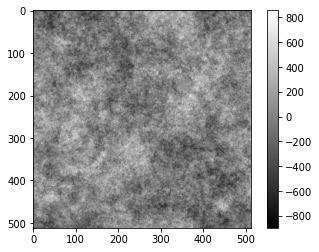

In [22]:
N=512
M=512
dim=(N,M)
sigma=100

# genero la imagen que solo contiene ruido
noise =  sigma*np.random.standard_normal(dim)

# genero filtro. Hay que ponerlo de una forma un poco extraña

filtro=np.zeros(dim)
filtro[0,0]=1.
filtro[1,0]=-0.25
filtro[0,1]=-0.25
filtro[N-1,0]=-0.25
filtro[0,M-1]=-0.25

# Calculo las transformadas de Fourier del ruido
fft_noise= np.fft.fft2(noise)
fft_filtro=np.fft.fft2(filtro)

# Si hacemos lo siguiente genera ejemplos de un
# modelo Condicional autorregresivo.
# Si lo comentamos es de un Simultáneo autorregresivo
# Con el Simultaneo autorregresivo sale mucho más bonito.
# Mucho más correlacionado.

fft_filtro=np.sqrt(fft_filtro)

# El filtro tiene un cero en la posición (0,0)
# por eso protesta al invertirlo ahora

inv=1/fft_filtro
inv[0,0]=0

conv=fft_noise*inv

# Esta sería la realización del modelo condicional autorregresivo
image=np.real(np.fft.ifft2(conv))


#Lo dibujamos
plt.imshow(image,cmap='gray'), plt.colorbar()
 

Ahora voy a umbralizar f. Si f>0 le asigno clase 1 y si es menor le asigno clase 0. Observa que el resultado es igual que el pasarle una sigmoide a f y quedarnos con la clase que tiene más probabilidad

(<matplotlib.image.AxesImage at 0x7fa44f234710>,
 <matplotlib.colorbar.Colorbar at 0x7fa44f1f3910>)

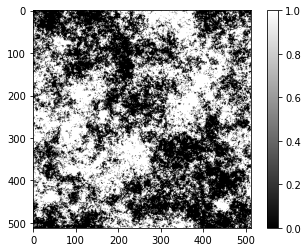

In [23]:

image_b=image>0
plt.imshow(image_b,cmap='gray'), plt.colorbar()
 